# Djikstra's Algorithm
## This program is just for understanding and visualising graphs using python. This isn't the recommended method as it uses inbuilt heapq module and dictionaries to solve the problem which most probably won't be agreed by the faculty.


The program will be using random generated nodes and then shall create a graph to visualise and run djikstra's algo on it

### Imports
We shall import necessary modules which shall aid us in the above mentioned processes

In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx
import random

### Class Creation
We shall create a class titled GraphNode that shall store a node's children and the weights to reach them

In [2]:
class GraphNode(object):
    def __init__(self,node,children,weight):
        self.node = node
        self.children = children
        self.weight = weight

### Djikstra Algorithm

In [3]:
def djikstra(graph : dict, startNode, finalNode):
    # Import heapq as to keep everything sorted as we move ahead by adding new elements to the queue.
    # Python's heapq can be imagined as a priority queue
    import heapq
    from collections import defaultdict
    order = []
    path = {}
    heaped = set()
    visited = set()
    distance = defaultdict(lambda : float('inf'))
    distance[startNode] = 0
    heapq.heappush(order,(0,startNode))
    
    # We now go into a while loop with the goal to find the minimum distance required to reach finalNode from startNode
    while True:
        dist,node = heapq.heappop(order)
        children = graph[node].children
        weight = graph[node].weight


        for i in range(len(children)):
            if children[i] not in visited:
                if distance[children[i]] > dist + weight[i]:
                    newDist = dist + weight[i]
                    if children[i] in heaped:
                        order.remove((distance[children[i]],children[i]))
                        heapq.heapify(order)
                        heapq.heappush(order,(newDist,children[i]))
                    else:
                        heapq.heappush(order,(newDist,children[i]))
                    distance[children[i]] = newDist
                    heaped.add(children[i])
                    path[children[i]] = node



        visited.add(node)
        if finalNode in visited:
            break
        if not visited:
            break


    node = path[finalNode]
    pathString = str(finalNode)
    finalPath = [finalNode]
    while node != startNode:
        pathString = str(node) +  " -> " + pathString 
        finalPath.insert(0,node)
        node = path[node]
    pathString = str(node) +  " -> " + pathString
    finalPath.insert(0,node)
    print(pathString)


    print("Cost is " + str(dist))
    return {"Cost":dist,"Path":finalPath}


### Initialisation
We initialise two dictionaries, one to store the required GraphNode Class and the other to store the edge weights.
We also initialise a networkx graph used for visualisation.

In [4]:
graph = {}
edges = {}
G = nx.Graph()

In [5]:
totalNodes = int(input('Enter the number of nodes: '))
totalNodes

6

### Visual I
Here we first generate random nodes and then create a graph, then we use networkx to display the generated graph

[1, 2, 4, 3] [1, 1, 17, 16]
[0, 2, 3] [1, 7, 4]
[1, 4, 3, 0] [7, 5, 8, 1]
[0, 2, 1, 4] [16, 8, 4, 8]
[1, 3, 2] [5, 8, 5]
[1] [9]


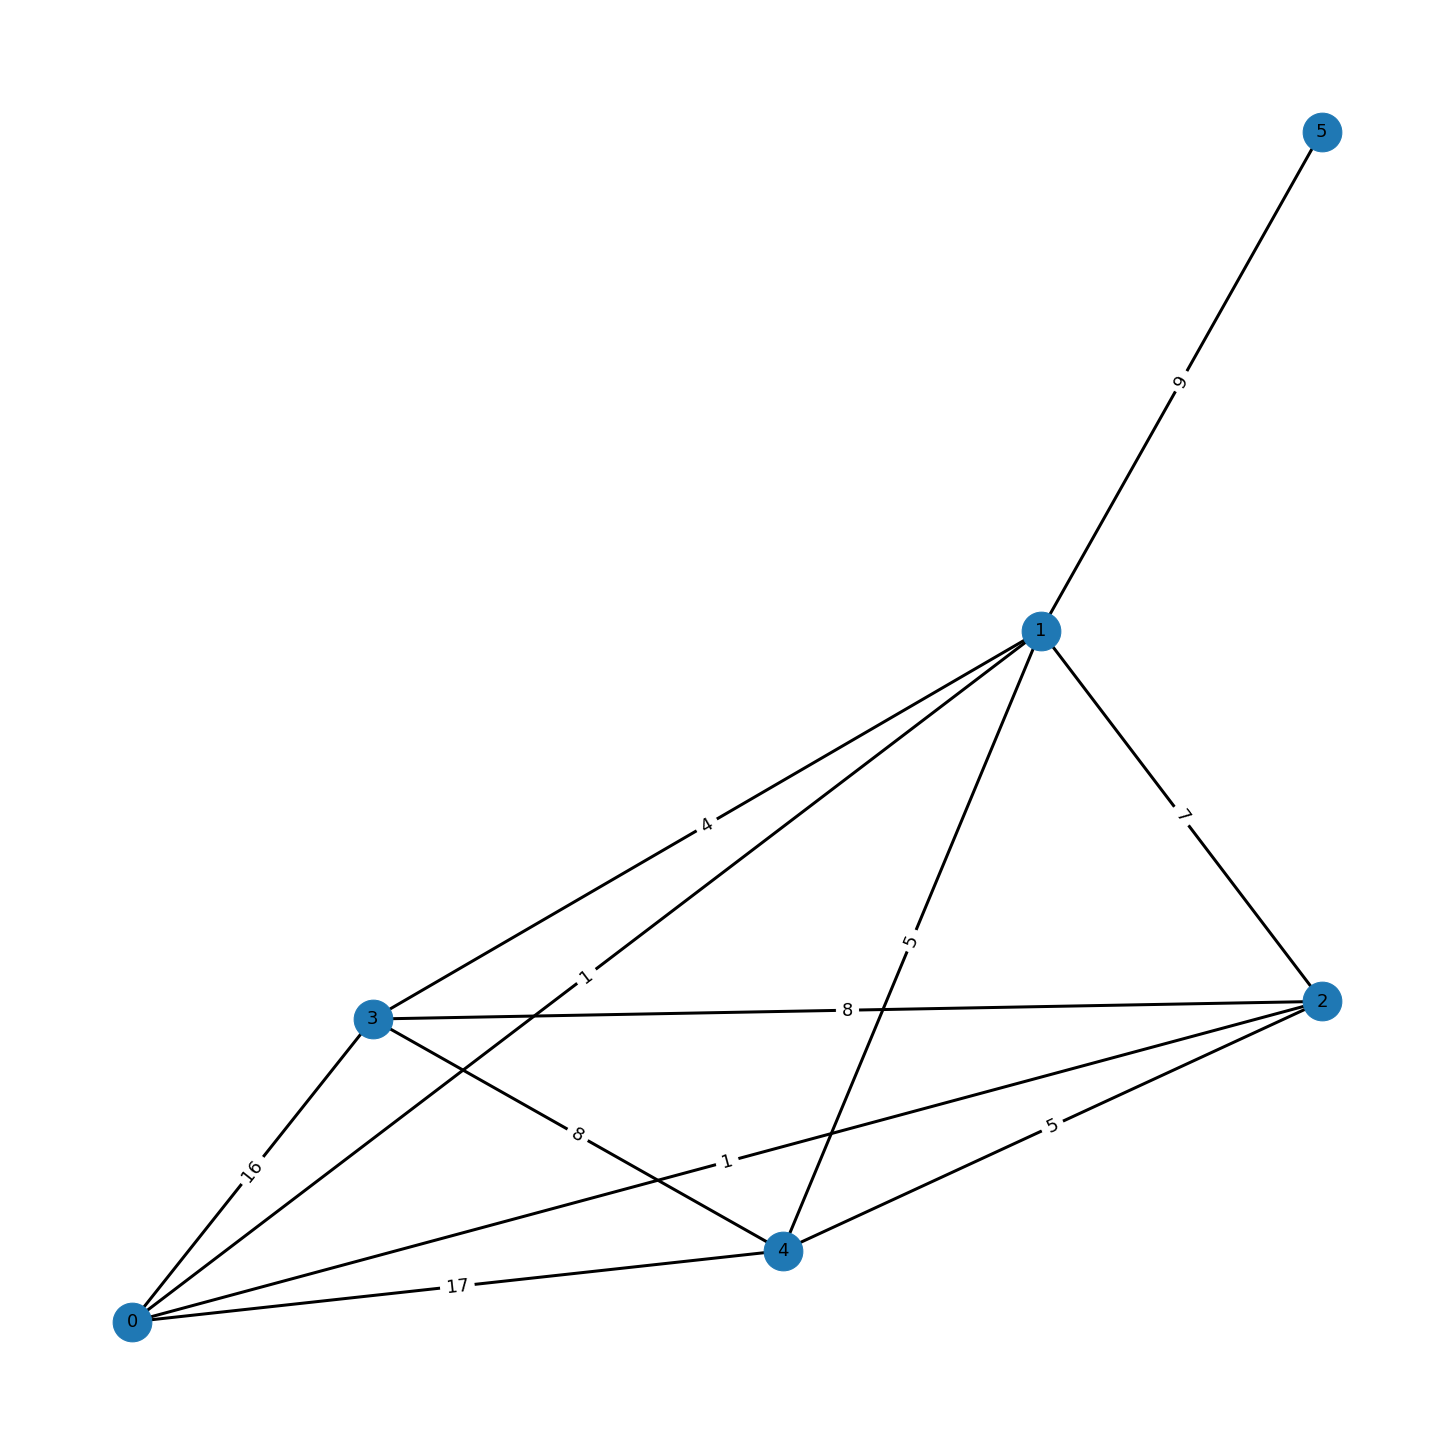

In [6]:
plt.rcParams["figure.figsize"] = (20,20)
for i in range(totalNodes):
    childCount = random.randrange(1,totalNodes)
    added = set()
    children = []
    weights = []
    for val in range(childCount):
        node = -1
        while node == i or node == -1 or node  in added:
            node = random.randrange(0,childCount + 1)
        weight = random.randrange(1,20)
        if (i,node) not in edges and (node,i) not in edges:
            G.add_edge(i,node,weight=weight)
            edges[(i,node)] = weight
            children.append(node)
            added.add(node)
            weights.append(weight)
        else:
            if (i,node) in edges:
                children.append(node)
                added.add(node)
                weights.append(edges[(i,node)])
            elif (node,i) in edges:
                children.append(node)
                added.add(node)
                weights.append(edges[(node,i)])
    print(children,weights)
    graph[i] = GraphNode(i,children,weights)
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels = True,width=3,font_size=18,node_size=1500)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edges,font_size=18)

plt.show()

In [7]:
startNode = int(input('Enter the start node'))
startNode


0

In [8]:
finalNode = int(input('Enter the final node'))
finalNode

3

### Running the Algo
Once we have the required start and finish points, we can run djikstra's algo on it and get the respective outputs

In [9]:
deets = djikstra(graph,startNode,finalNode)

0 -> 1 -> 3
Cost is 5


### Visual II
Since we have now received the path to be followed, we shall again create a graph with the edge colors of the final path as red

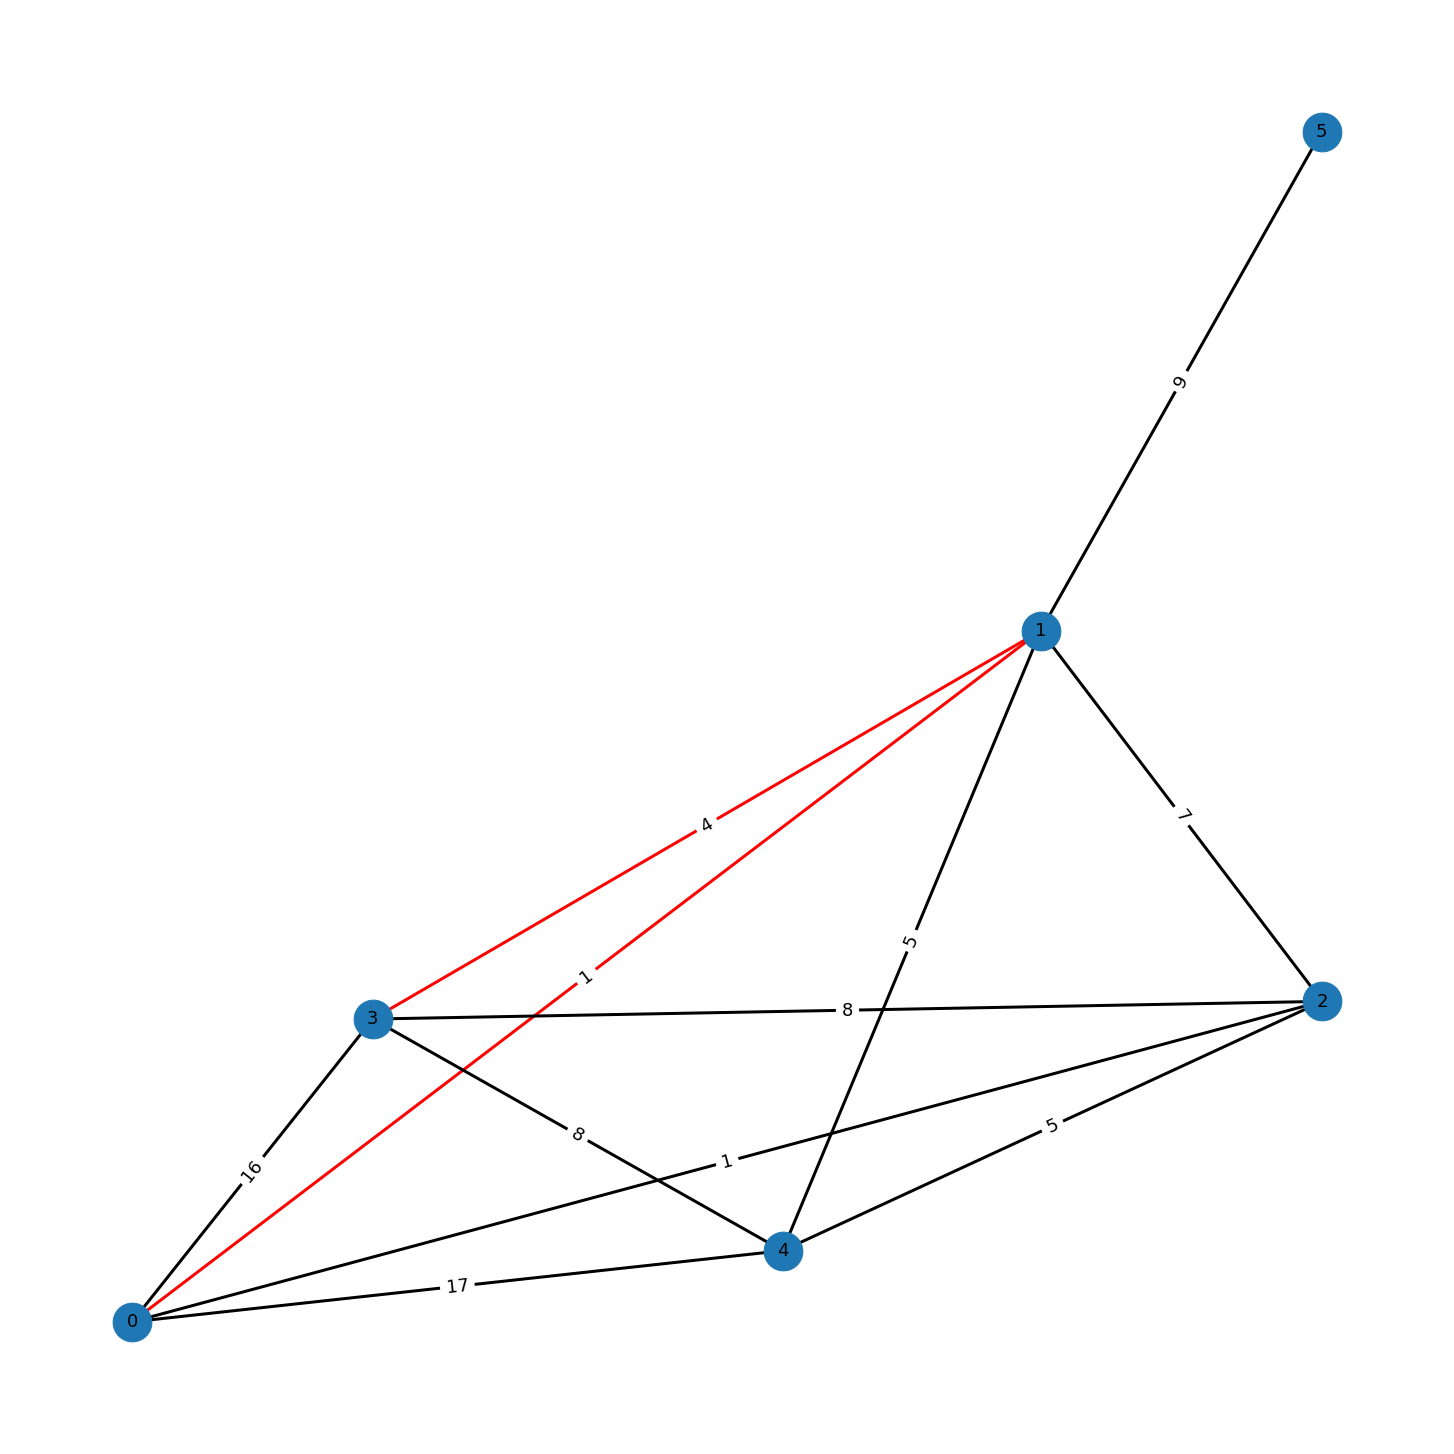

In [10]:
nodes = deets['Path']
pairs = set()
for i in range(len(nodes) - 1):
    pairs.add((nodes[i],nodes[i+1]))
nx.draw(G,pos,with_labels = True,width=3,font_size=18,node_size=1500,edge_color=['red' if (p[0],p[1]) in pairs or (p[1],p[0]) in pairs else 'black' for p in G.edges])
nx.draw_networkx_edge_labels(G,pos,edge_labels=edges,font_size=18)
plt.show()